<a href="https://colab.research.google.com/github/trishabhogawar/BigMart_Sales/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train = pd.read_csv('/train_v9rqX0R.csv')
test = pd.read_csv('/test_AbJTz2l..csv')
ss=pd.read_csv('/sample_submission_8RXa3c6.csv')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
train.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
test.isna().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [ ]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [ ]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})
test['Item_Fat_Content']=test['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})

In [ ]:
train['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [ ]:
test['Item_Visibility'].unique()

array([0.00756484, 0.03842768, 0.09957491, ..., 0.1429909 , 0.07352856,
       0.10472015])

In [ ]:
train['Item_Identifier'] = train['Item_Identifier'].str.slice(0,2)
test['Item_Identifier'] = test['Item_Identifier'].str.slice(0,2)

In [ ]:
train['running'] = 2013 - train['Outlet_Establishment_Year']
test['running'] = 2013 - test['Outlet_Establishment_Year']

In [ ]:
train['price/wt'] = train['Item_MRP'] /train['Item_Weight']
test['price/wt'] = test['Item_MRP'] /test['Item_Weight']

In [ ]:
train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [ ]:
test['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [ ]:
train['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

<Axes: xlabel='Item_MRP', ylabel='Density'>

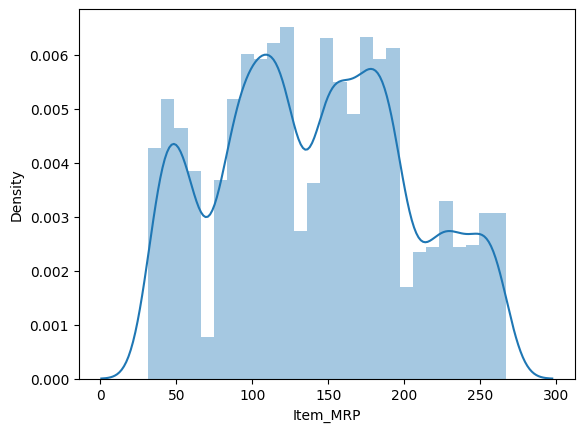

In [ ]:
sns.distplot(train['Item_MRP'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

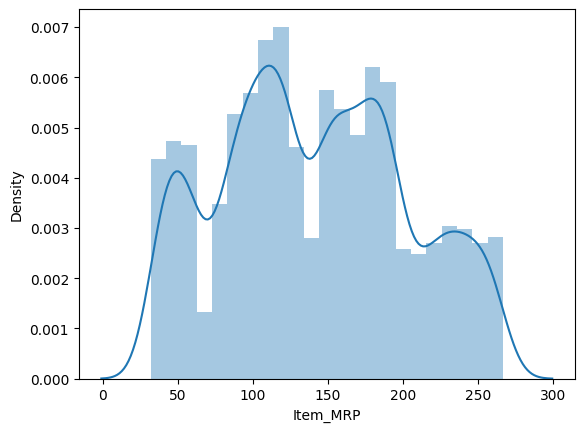

In [ ]:
sns.distplot(test['Item_MRP'])

<Axes: xlabel='Item_Weight', ylabel='Density'>

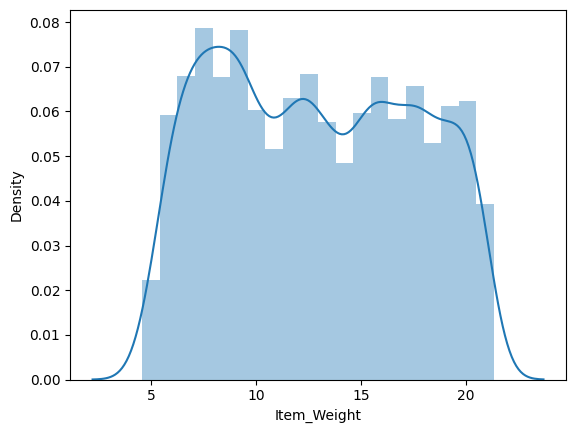

In [ ]:
sns.distplot(train['Item_Weight'])


In [ ]:

bins = [0, 5, 10, 20, float('inf')]
labels = ['<5', '5-10', '10-20', '>20']

train['Weight_Category'] = pd.cut(train['Item_Weight'], bins=bins, labels=labels, right=False).astype('object')
test['Weight_Category'] = pd.cut(test['Item_Weight'], bins=bins, labels=labels, right=False).astype('object')




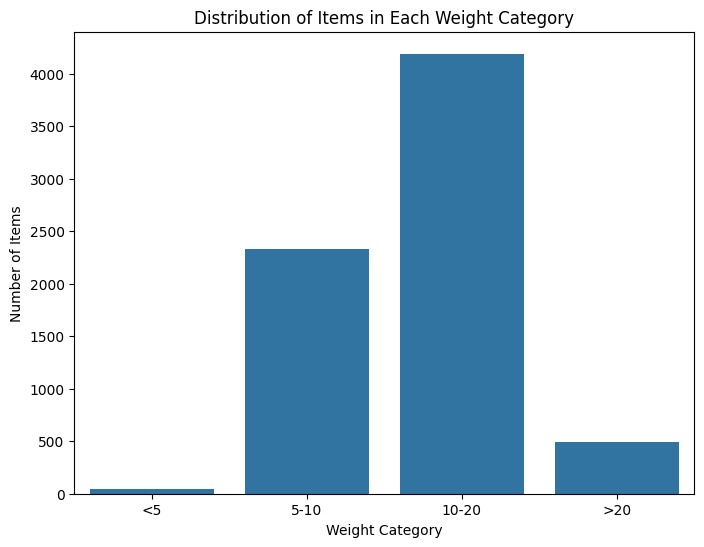

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Weight_Category', order=['<5', '5-10', '10-20', '>20'])
plt.title("Distribution of Items in Each Weight Category")
plt.xlabel("Weight Category")
plt.ylabel("Number of Items")
plt.show()

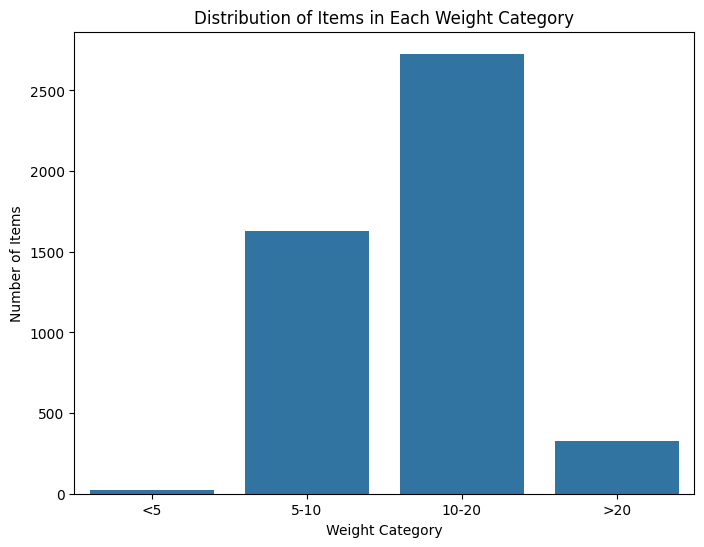

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=test, x='Weight_Category', order=['<5', '5-10', '10-20', '>20'])
plt.title("Distribution of Items in Each Weight Category")
plt.xlabel("Weight Category")
plt.ylabel("Number of Items")
plt.show()

In [ ]:
train.Weight_Category.fillna("10-20",inplace=True)
test.Weight_Category.fillna("10-20",inplace=True)

<Axes: xlabel='Item_Visibility', ylabel='Density'>

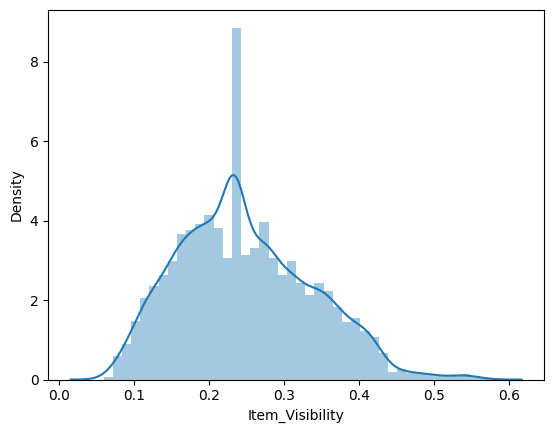

In [ ]:
sns.distplot(train['Item_Visibility'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

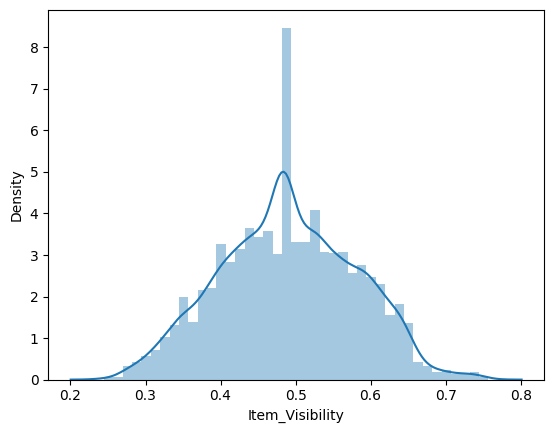

In [ ]:
sns.distplot(np.sqrt(train['Item_Visibility']))

In [ ]:
train['Item_Visibility'] = np.sqrt(train['Item_Visibility'])
test['Item_Visibility'] = np.sqrt(test['Item_Visibility'])

In [ ]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0, train['Item_Visibility'].median())
test['Item_Visibility'] = test['Item_Visibility'].replace(0, test['Item_Visibility'].median())

<Axes: xlabel='Item_Visibility', ylabel='Density'>

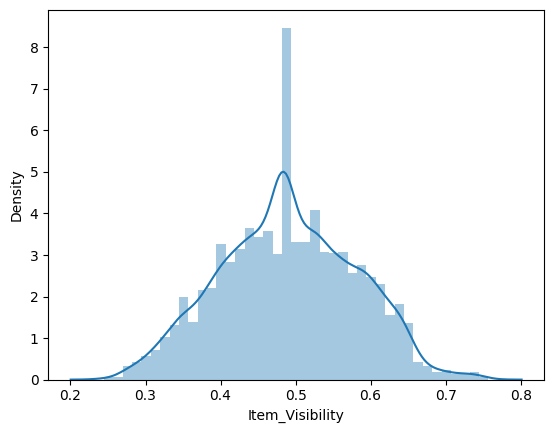

In [ ]:
sns.distplot(train['Item_Visibility'])

In [ ]:
train['Outlet_Size'].value_counts()

,count
Outlet_Size,
Small,4798
Medium,2793
High,932


<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

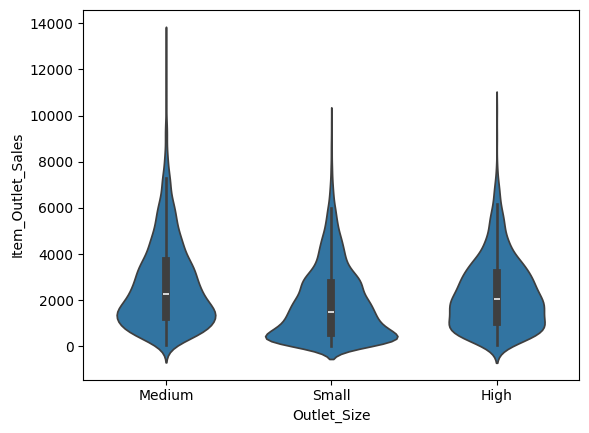

In [ ]:
sns.violinplot(x=train.Outlet_Size.fillna("Missing"),y='Item_Outlet_Sales',data=train)

In [ ]:
train.Outlet_Size.fillna("Small",inplace=True)

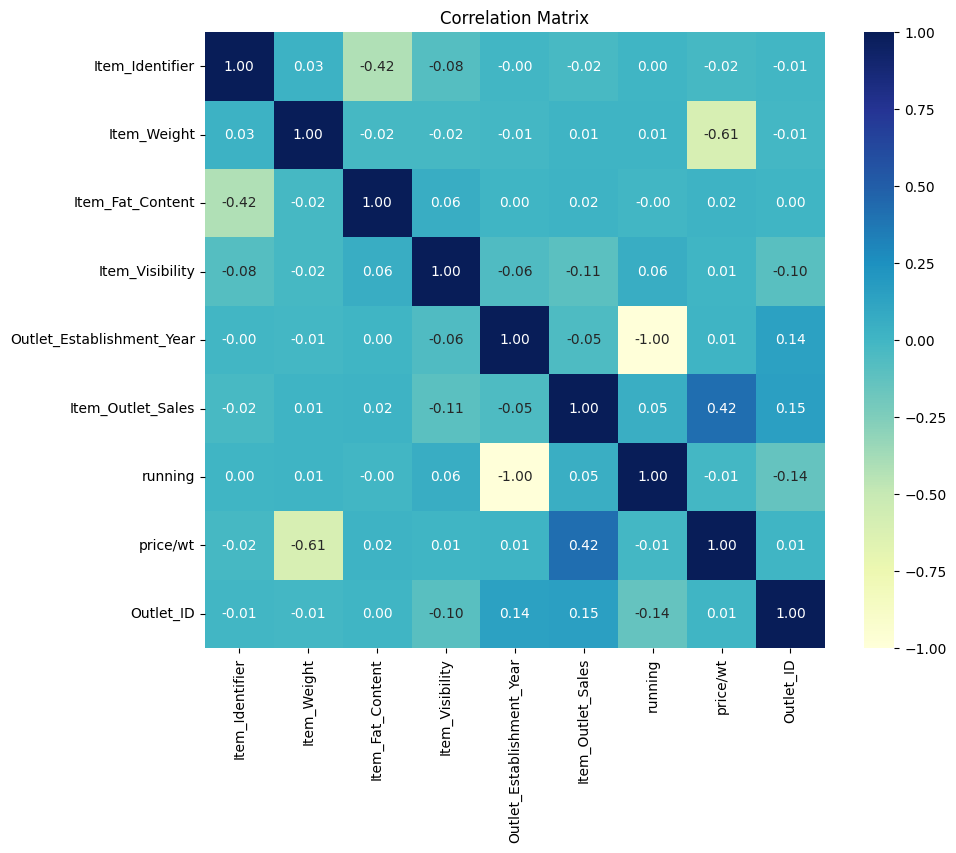

In [ ]:
numeric_features = train.select_dtypes(include=np.number).columns
correlation_matrix = train[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
y_train = train['Item_Outlet_Sales']
x_train = train.drop(['Item_Outlet_Sales','Outlet_Establishment_Year','Item_Weight','price/wt'],axis=1)

In [ ]:
x_train.isna().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0
running,0


In [ ]:
from catboost import CatBoostRegressor, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]

def objective(trial,data=x_train,target=y_train):

    train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size=0.15,random_state=42)
    param = {
        'loss_function': 'RMSE',
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'max_bin': trial.suggest_int('max_bin', 200, 400),
        'subsample': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.006, 0.018),
        'n_estimators':  1000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
    }
    model = CatBoostRegressor(**param,cat_features=categorical_features)

    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=200,verbose=False)

    preds = model.predict(test_x)

    rmse = mean_squared_error(test_y, preds,squared=False)

    return rmse

In [ ]:
Best_trial = {'l2_leaf_reg': 0.001061926310,'max_bin': 322,
 'learning_rate': 0.01081467174,'max_depth': 5,'random_state': 2020,'min_data_in_leaf': 163,
              'loss_function': 'RMSE','n_estimators':  1000}

In [ ]:
for col in x_train.columns[categorical_features]:
    x_train[col] = x_train[col].astype(str)
    test[col] = test[col].astype(str)

In [ ]:
from catboost import CatBoostRegressor, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]
model = CatBoostRegressor(**Best_trial,cat_features=categorical_features)
model.fit(x_train, y_train)
test_pred = model.predict(test[x_train.columns])

0:	learn: 1695.8568225	total: 9.4ms	remaining: 9.39s
1:	learn: 1685.6042358	total: 18.1ms	remaining: 9.05s
2:	learn: 1675.4374853	total: 26ms	remaining: 8.63s
3:	learn: 1665.3646050	total: 32ms	remaining: 7.96s
4:	learn: 1655.5094859	total: 37.4ms	remaining: 7.44s
5:	learn: 1645.6241756	total: 43.9ms	remaining: 7.27s
6:	learn: 1635.9157414	total: 49.6ms	remaining: 7.03s
7:	learn: 1626.3220920	total: 55.7ms	remaining: 6.9s
8:	learn: 1616.9806047	total: 60.9ms	remaining: 6.71s
9:	learn: 1607.8902618	total: 66.4ms	remaining: 6.57s
10:	learn: 1598.7569518	total: 71.9ms	remaining: 6.47s
11:	learn: 1589.6972393	total: 78.6ms	remaining: 6.47s
12:	learn: 1581.2047499	total: 85.9ms	remaining: 6.52s
13:	learn: 1572.8209401	total: 91.9ms	remaining: 6.47s
14:	learn: 1564.3478930	total: 96.8ms	remaining: 6.36s
15:	learn: 1555.9248960	total: 104ms	remaining: 6.41s
16:	learn: 1547.6769998	total: 110ms	remaining: 6.35s
17:	learn: 1539.5965683	total: 116ms	remaining: 6.31s
18:	learn: 1531.8992664	total

In [ ]:
test_pred[test_pred<33]=33
ss['Item_Outlet_Sales'] = test_pred
ss.to_csv('test_catboost.csv',index=False)

In [ ]:
import os
os.getcwd()

'/content'